<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min 

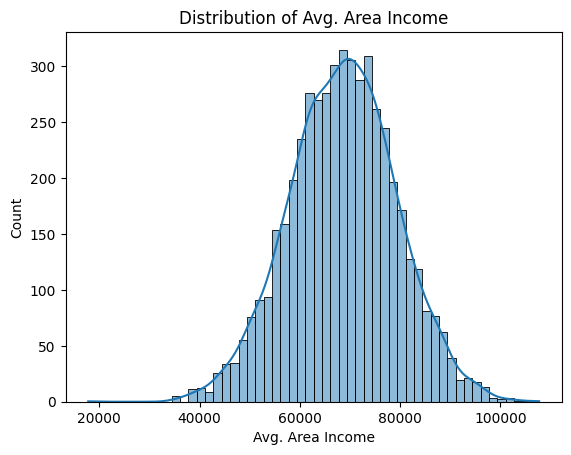

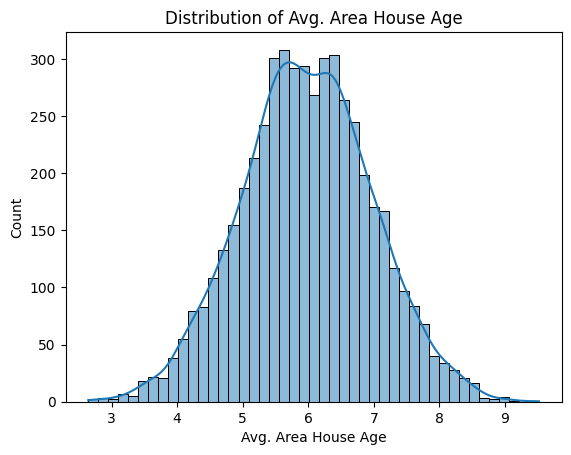

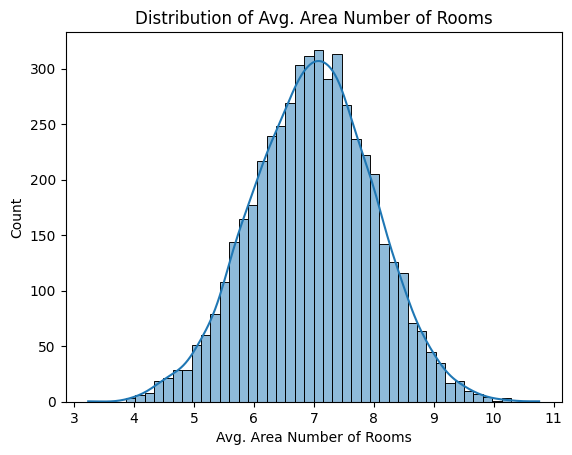

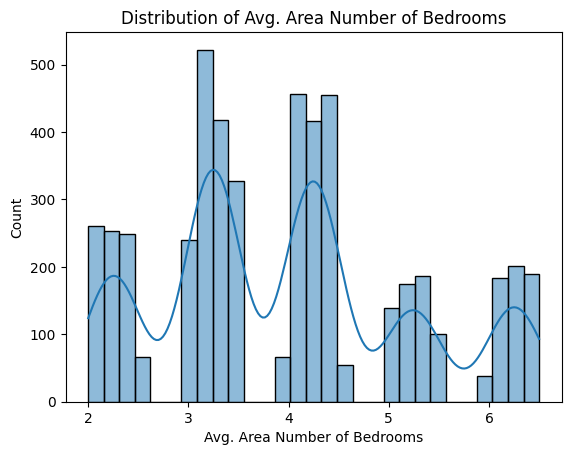

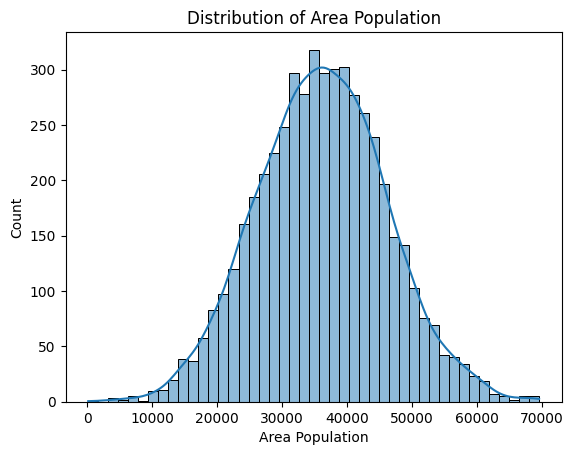

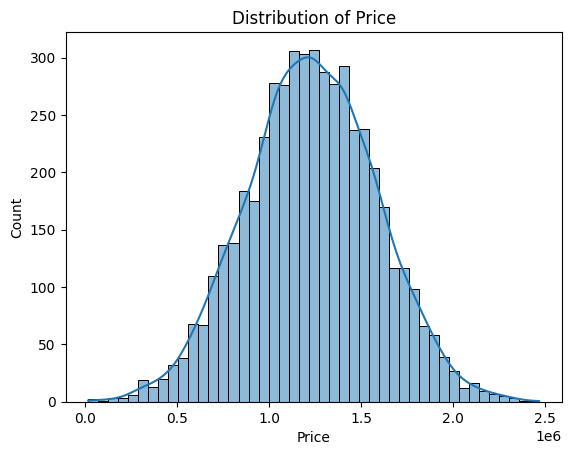

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Housing.csv')

# Basic info
print(df.info())
print(df.describe())

# Missing values
print(df.isnull().sum())

# Visualize distributions
numerical_features = ['Avg. Area Income', 
                      'Avg. Area House Age', 
                      'Avg. Area Number of Rooms', 
                      'Avg. Area Number of Bedrooms', 
                      'Area Population', 
                      'Price']

import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_features:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
# Correct feature columns
X = df[['Avg. Area Income',
        'Avg. Area House Age',
        'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms',
        'Area Population']]

y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 10089009300.894522
R-squared: 0.9179971706834288


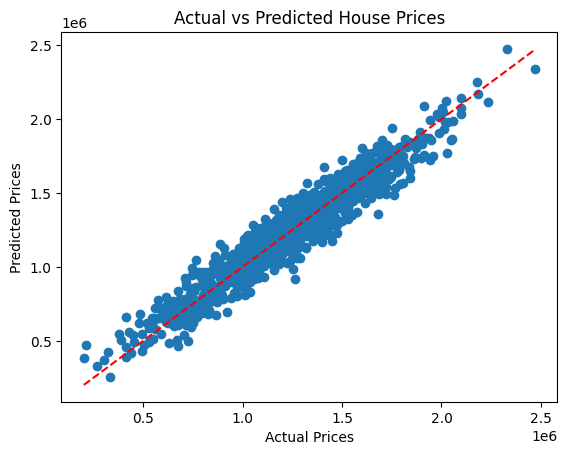

In [4]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.show()


In [5]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print(coefficients)


                        Feature    Coefficient
0              Avg. Area Income      21.652206
1           Avg. Area House Age  164666.480722
2     Avg. Area Number of Rooms  119624.012232
3  Avg. Area Number of Bedrooms    2440.377611
4               Area Population      15.270313
